In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
train_set = pd.read_csv(r'C:\Users\Shashank Sundi\Downloads\adult.data', header = None)
test_set = pd.read_csv(r'C:\Users\Shashank Sundi\Downloads\adult.test' , skiprows = 1, header = None)
col_labels = ['age', 'workclass', 'fnlwgt', 'education', 'education_num','marital_status', 'occupation','relationship', 'race', 'sex','capital_gain','capital_loss', 'hours_per_week', 'native_country', 'wage_class']

train_set.columns = col_labels
test_set.columns = col_labels

In [3]:
train_set.head()

,age,workclass,fnlwgt,education,education_num,marital_status,occupation,relationship,race,sex,capital_gain,capital_loss,hours_per_week,native_country,wage_class
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K


In [4]:
test_set.head()

,age,workclass,fnlwgt,education,education_num,marital_status,occupation,relationship,race,sex,capital_gain,capital_loss,hours_per_week,native_country,wage_class
0,25,Private,226802,11th,7,Never-married,Machine-op-inspct,Own-child,Black,Male,0,0,40,United-States,<=50K.
1,38,Private,89814,HS-grad,9,Married-civ-spouse,Farming-fishing,Husband,White,Male,0,0,50,United-States,<=50K.
2,28,Local-gov,336951,Assoc-acdm,12,Married-civ-spouse,Protective-serv,Husband,White,Male,0,0,40,United-States,>50K.
3,44,Private,160323,Some-college,10,Married-civ-spouse,Machine-op-inspct,Husband,Black,Male,7688,0,40,United-States,>50K.
4,18,?,103497,Some-college,10,Never-married,?,Own-child,White,Female,0,0,30,United-States,<=50K.


In [5]:
data=pd.concat([train_set,test_set],axis=0)

In [6]:
data.head()

,age,workclass,fnlwgt,education,education_num,marital_status,occupation,relationship,race,sex,capital_gain,capital_loss,hours_per_week,native_country,wage_class
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K


In [7]:
print(train_set.shape)
print(test_set.shape)
print(data.shape)

(32561, 15)
(16281, 15)
(48842, 15)


In [8]:
data.dtypes

age                int64
workclass         object
fnlwgt             int64
education         object
education_num      int64
marital_status    object
occupation        object
relationship      object
race              object
sex               object
capital_gain       int64
capital_loss       int64
hours_per_week     int64
native_country    object
wage_class        object
dtype: object

In [9]:
#getting indices for catgorical and numerical columns

a=data.dtypes[data.dtypes=='object'].index
b=data.dtypes[data.dtypes=='int64'].index
print(a,"\n",b)

Index(['workclass', 'education', 'marital_status', 'occupation',
       'relationship', 'race', 'sex', 'native_country', 'wage_class'],
      dtype='object') 
 Index(['age', 'fnlwgt', 'education_num', 'capital_gain', 'capital_loss',
       'hours_per_week'],
      dtype='object')


In [10]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 48842 entries, 0 to 16280
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   age             48842 non-null  int64 
 1   workclass       48842 non-null  object
 2   fnlwgt          48842 non-null  int64 
 3   education       48842 non-null  object
 4   education_num   48842 non-null  int64 
 5   marital_status  48842 non-null  object
 6   occupation      48842 non-null  object
 7   relationship    48842 non-null  object
 8   race            48842 non-null  object
 9   sex             48842 non-null  object
 10  capital_gain    48842 non-null  int64 
 11  capital_loss    48842 non-null  int64 
 12  hours_per_week  48842 non-null  int64 
 13  native_country  48842 non-null  object
 14  wage_class      48842 non-null  object
dtypes: int64(6), object(9)
memory usage: 6.0+ MB


In [11]:
data.isnull().sum()

age               0
workclass         0
fnlwgt            0
education         0
education_num     0
marital_status    0
occupation        0
relationship      0
race              0
sex               0
capital_gain      0
capital_loss      0
hours_per_week    0
native_country    0
wage_class        0
dtype: int64

In [12]:
# replacing invalid data like ? with nan

data.replace(' ?',np.nan,inplace=True)

In [13]:
# checking null values in the features

data.isnull().sum()

age                  0
workclass         2799
fnlwgt               0
education            0
education_num        0
marital_status       0
occupation        2809
relationship         0
race                 0
sex                  0
capital_gain         0
capital_loss         0
hours_per_week       0
native_country     857
wage_class           0
dtype: int64

In [14]:
data[b].describe()

,age,fnlwgt,education_num,capital_gain,capital_loss,hours_per_week
count,48842.000000,4.884200e+04,48842.000000,48842.000000,48842.000000,48842.000000
mean,38.643585,1.896641e+05,10.078089,1079.067626,87.502314,40.422382
std,13.710510,1.056040e+05,2.570973,7452.019058,403.004552,12.391444
min,17.000000,1.228500e+04,1.000000,0.000000,0.000000,1.000000
25%,28.000000,1.175505e+05,9.000000,0.000000,0.000000,40.000000
50%,37.000000,1.781445e+05,10.000000,0.000000,0.000000,40.000000
75%,48.000000,2.376420e+05,12.000000,0.000000,0.000000,45.000000
max,90.000000,1.490400e+06,16.000000,99999.000000,4356.000000,99.000000


In [15]:
data[a].describe()

,workclass,education,marital_status,occupation,relationship,race,sex,native_country,wage_class
count,46043,48842,48842,46033,48842,48842,48842,47985,48842
unique,8,16,7,14,6,5,2,41,4
top,Private,HS-grad,Married-civ-spouse,Prof-specialty,Husband,White,Male,United-States,<=50K
freq,33906,15784,22379,6172,19716,41762,32650,43832,24720


In [16]:
data.wage_class.value_counts()

 <=50K     24720
 <=50K.    12435
 >50K       7841
 >50K.      3846
Name: wage_class, dtype: int64

In [17]:
data=data.replace({' <=50K':0,' >50K':1,' <=50K.':0,' >50K.':1})

In [18]:
data.columns

Index(['age', 'workclass', 'fnlwgt', 'education', 'education_num',
       'marital_status', 'occupation', 'relationship', 'race', 'sex',
       'capital_gain', 'capital_loss', 'hours_per_week', 'native_country',
       'wage_class'],
      dtype='object')

In [19]:
data.head()

,age,workclass,fnlwgt,education,education_num,marital_status,occupation,relationship,race,sex,capital_gain,capital_loss,hours_per_week,native_country,wage_class
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,0
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,0
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,0
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,0
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,0


In [20]:
data.reset_index(inplace=True)

In [21]:
data.isnull().sum()

index                0
age                  0
workclass         2799
fnlwgt               0
education            0
education_num        0
marital_status       0
occupation        2809
relationship         0
race                 0
sex                  0
capital_gain         0
capital_loss         0
hours_per_week       0
native_country     857
wage_class           0
dtype: int64

In [22]:
#capturing the importance of missing null values in occupation

data['occ_nan']=np.where(data.occupation.isnull(),1,0)

In [23]:
# Random Sample imputation for workclass , occupation , native country

random_sample=data.occupation.dropna().sample(data.occupation.isnull().sum(),random_state=0)
random_sample.index=data[data.occupation.isnull()].index
data.loc[data.occupation.isnull(),'occupation']=random_sample

random_sample=data.workclass.dropna().sample(data.workclass.isnull().sum(),random_state=0)
random_sample.index=data[data.workclass.isnull()].index
data.loc[data.workclass.isnull(),'workclass']=random_sample

random_sample=data.native_country.dropna().sample(data.native_country.isnull().sum(),random_state=0)
random_sample.index=data[data.native_country.isnull()].index
data.loc[data.native_country.isnull(),'native_country']=random_sample

In [24]:
data.isnull().sum()

index             0
age               0
workclass         0
fnlwgt            0
education         0
education_num     0
marital_status    0
occupation        0
relationship      0
race              0
sex               0
capital_gain      0
capital_loss      0
hours_per_week    0
native_country    0
wage_class        0
occ_nan           0
dtype: int64

In [25]:
data=data[['age', 'workclass', 'fnlwgt', 'education', 'education_num','marital_status', 'occupation','occ_nan', 'relationship', 'race', 'sex', 'capital_gain', 'capital_loss', 'hours_per_week', 'native_country','wage_class']]

In [26]:
a

Index(['workclass', 'education', 'marital_status', 'occupation',
       'relationship', 'race', 'sex', 'native_country', 'wage_class'],
      dtype='object')

In [27]:
# checking for imbalanced data

data.wage_class.value_counts()

0    37155
1    11687
Name: wage_class, dtype: int64

(array([0, 1, 2, 3, 4, 5, 6, 7]), <a list of 8 Text major ticklabel objects>)

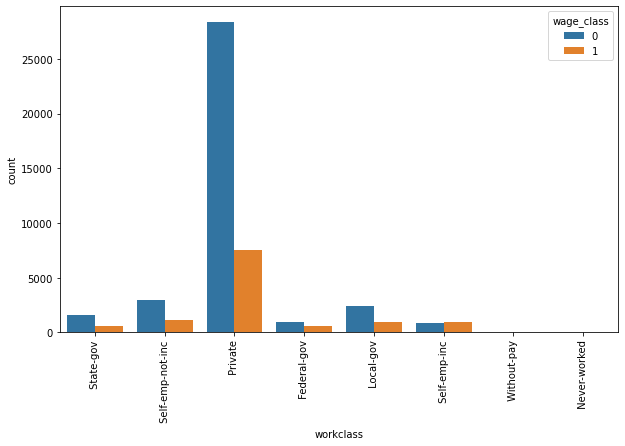

In [28]:
fig=plt.figure(figsize=(10,6))
sns.countplot(data.workclass,hue=data.wage_class)
plt.xticks(rotation=90)

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15]),
 <a list of 16 Text major ticklabel objects>)

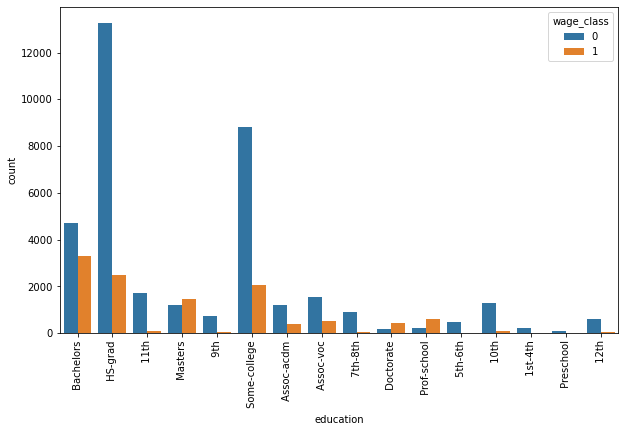

In [29]:
fig=plt.figure(figsize=(10,6))
sns.countplot(data.education,hue=data.wage_class)
plt.xticks(rotation=90)

(array([0, 1, 2, 3, 4, 5, 6]), <a list of 7 Text major ticklabel objects>)

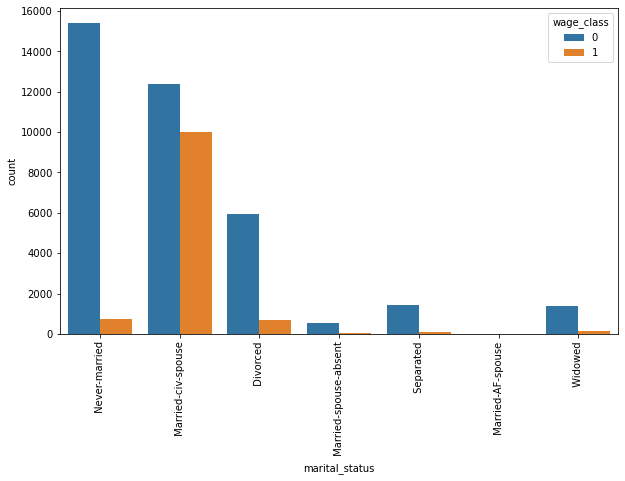

In [30]:
fig=plt.figure(figsize=(10,6))
sns.countplot(data.marital_status,hue=data.wage_class)
plt.xticks(rotation=90)

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13]),
 <a list of 14 Text major ticklabel objects>)

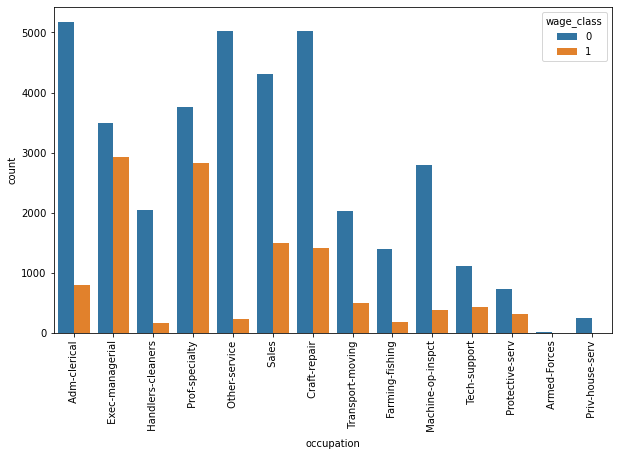

In [31]:
fig=plt.figure(figsize=(10,6))
sns.countplot(data.occupation,hue=data.wage_class)
plt.xticks(rotation=90)

(array([0, 1]), <a list of 2 Text major ticklabel objects>)

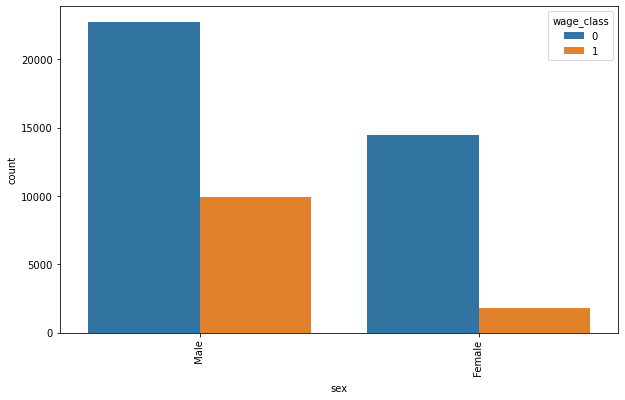

In [32]:
fig=plt.figure(figsize=(10,6))
sns.countplot(data.sex,hue=data.wage_class)
plt.xticks(rotation=90)

(array([0, 1, 2, 3, 4]), <a list of 5 Text major ticklabel objects>)

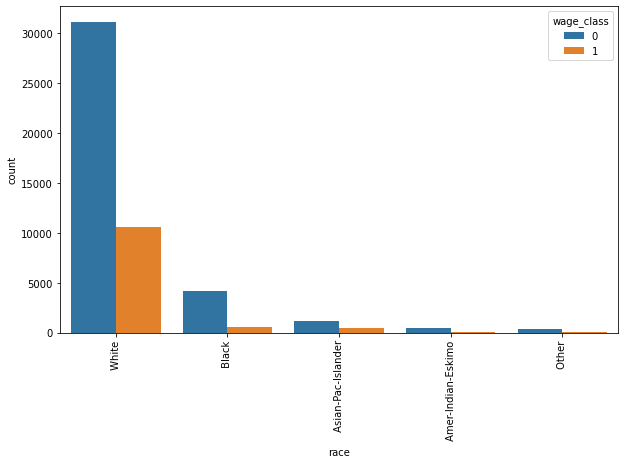

In [33]:
fig=plt.figure(figsize=(10,6))
sns.countplot(data.race,hue=data.wage_class)
plt.xticks(rotation=90)

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33,
        34, 35, 36, 37, 38, 39, 40]),
 <a list of 41 Text major ticklabel objects>)

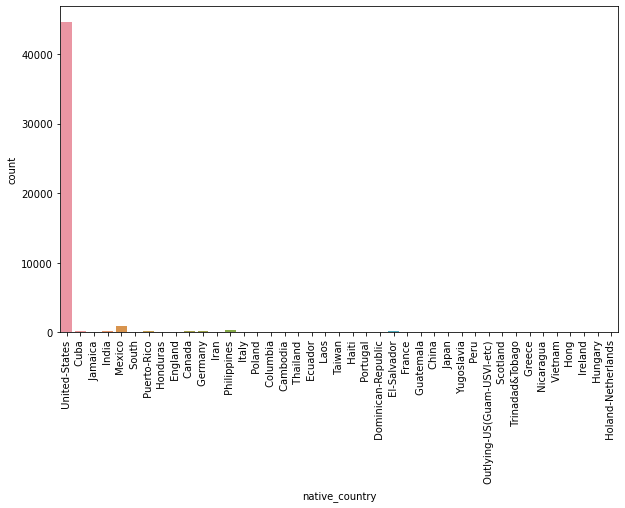

In [34]:
fig=plt.figure(figsize=(10,6))
sns.countplot(data.native_country)
plt.xticks(rotation=90)

(array([0, 1]), <a list of 2 Text major ticklabel objects>)

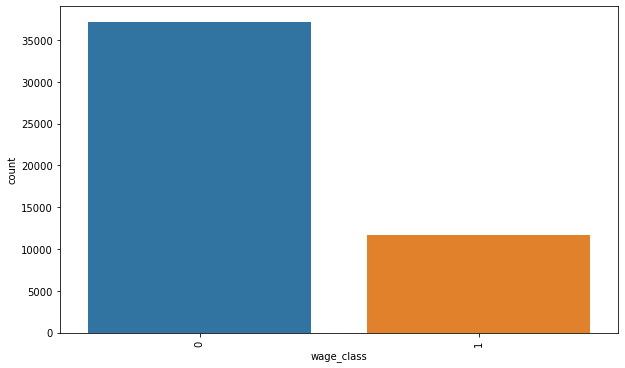

In [35]:
fig=plt.figure(figsize=(10,6))
sns.countplot(data.wage_class)
plt.xticks(rotation=90)

In [36]:
b

Index(['age', 'fnlwgt', 'education_num', 'capital_gain', 'capital_loss',
       'hours_per_week'],
      dtype='object')

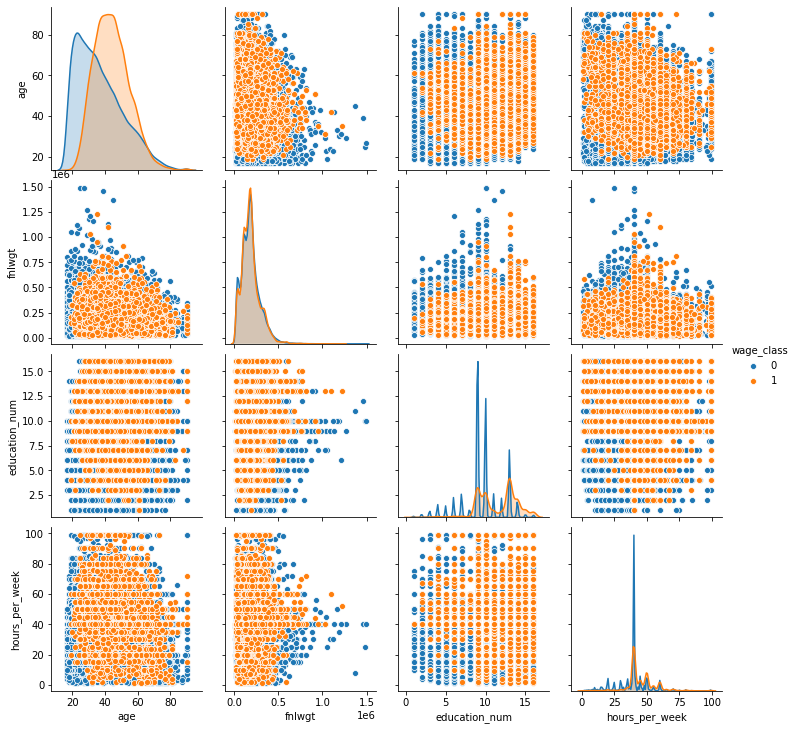

In [37]:
sns.pairplot(data=data[['age', 'fnlwgt', 'education_num','hours_per_week','wage_class']] ,hue="wage_class")

In [38]:
b

Index(['age', 'fnlwgt', 'education_num', 'capital_gain', 'capital_loss',
       'hours_per_week'],
      dtype='object')

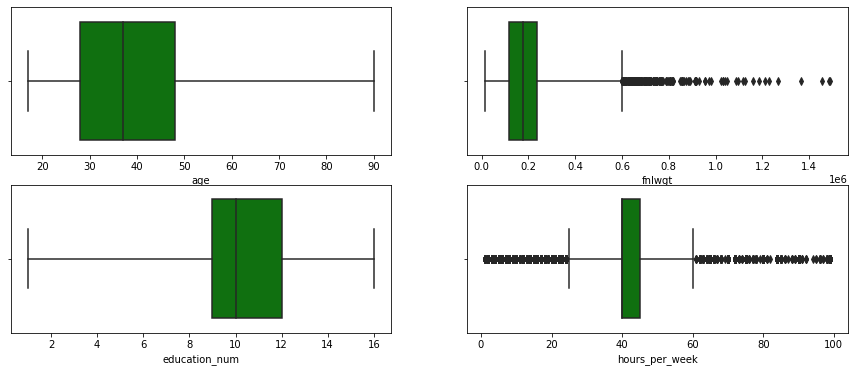

In [39]:
# Checking for Outliers

fig,ax=plt.subplots(2,2,figsize=(15,6))
i=0
j=0
for col in ['age', 'fnlwgt', 'education_num','hours_per_week']:
    sns.boxplot(data[col],ax=ax[i,j],color='g',whis=3)
    if j==1:
        j=-1
        i+=1
    j+=1

In [40]:
# Finding Outliers and imputing them with the mean value for that feature#

for i in ['age', 'fnlwgt', 'education_num','hours_per_week'] :
    print("\n",i)
    b=0
    Q1=data[i].quantile(0.25)
    Q3=data[i].quantile(0.75)
    IQR=Q3-Q1
    print(Q1,Q3,IQR)
    for idx,j in enumerate(data[i]):
        if j>Q3+3*IQR or j<Q1-3*IQR:
            b+=1
            data.loc[idx,i]=data[i].mean()
    print(f"No. of outliers :{b}")      


 age
28.0 48.0 20.0
No. of outliers :0

 fnlwgt
117550.5 237642.0 120091.5
No. of outliers :223

 education_num
9.0 12.0 3.0
No. of outliers :0

 hours_per_week
40.0 45.0 5.0
No. of outliers :6631


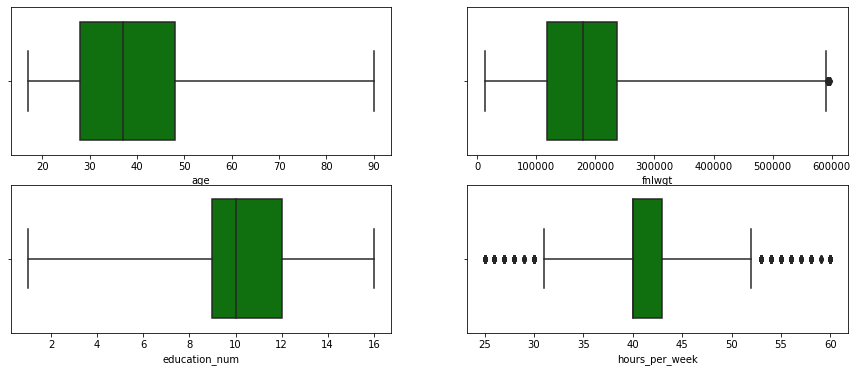

In [41]:
# checking the no. of outliers after imputin the with mean value
# It can be observed that most of the outliers are removed.
# We dont remove them completely as they might contain some important information

fig,ax=plt.subplots(2,2,figsize=(15,6))
i=0
j=0
for col in ['age', 'fnlwgt', 'education_num','hours_per_week']:
    sns.boxplot(data[col],ax=ax[i,j],color='g',whis=3)
    if j==1:
        j=-1
        i+=1
    j+=1

In [42]:
# One Hot Encoding sex column

data.sex=pd.get_dummies(data.sex,drop_first=True)

In [43]:
#ordinal encoding -- workclass , education , occupation
#frequency/onehot encoding -- marital status , relationship ,race ,country

In [44]:
data.workclass.unique()

array([' State-gov', ' Self-emp-not-inc', ' Private', ' Federal-gov',
       ' Local-gov', ' Self-emp-inc', ' Without-pay', ' Never-worked'],
      dtype=object)

In [45]:
# Instead of using ordinal encoder , we are using manual mapping

workclass_map={k:i for i,k in enumerate([' Never-worked', ' Without-pay', ' State-gov',' Federal-gov', ' Local-gov', ' Self-emp-inc',' Self-emp-not-inc', ' Private'])}
data.workclass=data.workclass.map(workclass_map)

In [46]:
data.education.unique()

array([' Bachelors', ' HS-grad', ' 11th', ' Masters', ' 9th',
       ' Some-college', ' Assoc-acdm', ' Assoc-voc', ' 7th-8th',
       ' Doctorate', ' Prof-school', ' 5th-6th', ' 10th', ' 1st-4th',
       ' Preschool', ' 12th'], dtype=object)

In [47]:
# encoder=OrdinalEncoder(categories=[[' Preschool',' 1st-4th',' 5th-6th',' 7th-8th',' 9th',' 10th', ' 11th', ' 12th',' HS-grad',' Prof-school',' Some-college', ' Assoc-acdm', ' Assoc-voc',' Bachelors', ' Masters',' Doctorate']])
# data.education=encoder.fit_transform(data[['education']])
# or
edu_map={k:i for i,k in enumerate([' Preschool',' 1st-4th',' 5th-6th',' 7th-8th',' 9th',' 10th', ' 11th', ' 12th',' HS-grad',' Prof-school',' Some-college', ' Assoc-acdm', ' Assoc-voc',' Bachelors', ' Masters',' Doctorate'])}
data.education=data.education.map(edu_map)

In [48]:
edu_map

{' Preschool': 0,
 ' 1st-4th': 1,
 ' 5th-6th': 2,
 ' 7th-8th': 3,
 ' 9th': 4,
 ' 10th': 5,
 ' 11th': 6,
 ' 12th': 7,
 ' HS-grad': 8,
 ' Prof-school': 9,
 ' Some-college': 10,
 ' Assoc-acdm': 11,
 ' Assoc-voc': 12,
 ' Bachelors': 13,
 ' Masters': 14,
 ' Doctorate': 15}

In [49]:
data.occupation.value_counts()

 Prof-specialty       6593
 Craft-repair         6441
 Exec-managerial      6420
 Adm-clerical         5967
 Sales                5811
 Other-service        5254
 Machine-op-inspct    3184
 Transport-moving     2522
 Handlers-cleaners    2209
 Farming-fishing      1582
 Tech-support         1537
 Protective-serv      1051
 Priv-house-serv       253
 Armed-Forces           18
Name: occupation, dtype: int64

In [50]:
idx=data.groupby(['occupation'])['wage_class'].mean().sort_values().index
occ_map={k:i for i,k in enumerate(idx)}
occ_map

{' Priv-house-serv': 0,
 ' Other-service': 1,
 ' Handlers-cleaners': 2,
 ' Farming-fishing': 3,
 ' Machine-op-inspct': 4,
 ' Adm-clerical': 5,
 ' Transport-moving': 6,
 ' Craft-repair': 7,
 ' Sales': 8,
 ' Tech-support': 9,
 ' Protective-serv': 10,
 ' Armed-Forces': 11,
 ' Prof-specialty': 12,
 ' Exec-managerial': 13}

In [51]:
data.occupation=data.occupation.map(occ_map)

In [52]:
marital_map=data.marital_status.value_counts().to_dict()
data.marital_status=data.marital_status.map(marital_map)

In [53]:
marital_map

{' Married-civ-spouse': 22379,
 ' Never-married': 16117,
 ' Divorced': 6633,
 ' Separated': 1530,
 ' Widowed': 1518,
 ' Married-spouse-absent': 628,
 ' Married-AF-spouse': 37}

In [54]:
relationship_map=data.relationship.value_counts().to_dict()
data.relationship=data.relationship.map(relationship_map)

In [55]:
relationship_map

{' Husband': 19716,
 ' Not-in-family': 12583,
 ' Own-child': 7581,
 ' Unmarried': 5125,
 ' Wife': 2331,
 ' Other-relative': 1506}

In [56]:
race_map=data.race.value_counts().to_dict()
data.race=data.race.map(race_map)

In [57]:
race_map

{' White': 41762,
 ' Black': 4685,
 ' Asian-Pac-Islander': 1519,
 ' Amer-Indian-Eskimo': 470,
 ' Other': 406}

In [58]:
def native(country):
    if country in [' United-States',' Canada']:
        return 'North_America'
    elif country in [' Puerto-Rico',' El-Salvador',' Cuba',' Jamaica',' Dominican-Republic',' Guatemala',' Haiti',' Nicaragua',' Trinadad&Tobago',' Honduras']:
        return 'Central_America' 
    elif country in [' Mexico',' Columbia',' Vietnam',' Peru',' Ecuador',' South',' Outlying-US(Guam-USVI-etc)']:
        return 'South_America'
    elif country in [' Germany',' England',' Italy',' Poland',' Portugal',' Greece',' Yugoslavia',' France',' Ireland',' Scotland',' Hungary',' Holand-Netherlands']:
        return 'EU'
    elif country in [' India',' Iran',' China',' Japan',' Thailand',' Hong',' Cambodia',' Laos',' Philippines',' Taiwan']:
        return 'Asian'
    else:
        return country
    
data.native_country = data.native_country.apply(native)

In [59]:
continent_map=data.native_country.value_counts().to_dict()
data.native_country=data.native_country.map(continent_map)

In [60]:
continent_map

{'North_America': 44799,
 'South_America': 1372,
 'Central_America': 963,
 'Asian': 918,
 'EU': 790}

In [61]:
data.columns

Index(['age', 'workclass', 'fnlwgt', 'education', 'education_num',
       'marital_status', 'occupation', 'occ_nan', 'relationship', 'race',
       'sex', 'capital_gain', 'capital_loss', 'hours_per_week',
       'native_country', 'wage_class'],
      dtype='object')

In [62]:
data=data[['age','workclass', 'fnlwgt', 'education', 'education_num', 'marital_status','occupation', 'occ_nan', 'relationship', 'race', 'sex', 'capital_gain','capital_loss', 'hours_per_week', 'native_country', 'wage_class']]
data

,age,workclass,fnlwgt,education,education_num,marital_status,occupation,occ_nan,relationship,race,sex,capital_gain,capital_loss,hours_per_week,native_country,wage_class
0,39,2,77516.0,13,13,16117,5,0,12583,41762,1,2174,0,40.000000,44799,0
1,50,6,83311.0,13,13,22379,13,0,19716,41762,1,0,0,40.422382,44799,0
2,38,7,215646.0,8,9,6633,2,0,12583,41762,1,0,0,40.000000,44799,0
3,53,7,234721.0,6,7,22379,2,0,19716,4685,1,0,0,40.000000,44799,0
4,28,7,338409.0,13,13,22379,12,0,2331,4685,0,0,0,40.000000,963,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
48837,39,7,215419.0,13,13,6633,12,0,12583,41762,0,0,0,36.000000,44799,0
48838,64,7,321403.0,8,9,1518,3,1,1506,4685,1,0,0,40.000000,44799,0
48839,38,7,374983.0,13,13,22379,12,0,19716,41762,1,0,0,50.000000,44799,0
48840,44,7,83891.0,13,13,6633,5,0,7581,1519,1,5455,0,40.000000,44799,0


In [63]:
train_set.shape

(32561, 15)

In [64]:
test_set.shape

(16281, 15)

In [65]:
from sklearn.preprocessing import LabelEncoder
encoder=LabelEncoder()
data.wage_class=encoder.fit_transform(data.wage_class)
X=data.drop(['wage_class'],axis=1)
y=data[['wage_class']]

In [ ]:
#later do
y = np.ravel(y)
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()
scaler.fit(X)
X=scaler.fit_transform(X)

In [ ]:
# Oversampling the minority class

from imblearn.over_sampling import SMOTE
smote=SMOTE(sampling_strategy='minority')
X,y=smote.fit_resample(X,y)
pd.DataFrame(y,columns=['wage_class']).affair.value_counts()

In [66]:
#Classification Models to try :
""" Logistic Regression , KNN , SVM , Naive Bayes Classifier , Dtree Classifier, XGB classifier , rand-forest classifier
Stacking """

' Logistic Regression , KNN , SVM , Naive Bayes Classifier , Dtree Classifier, XGB classifier , rand-forest classifier\nStacking '

In [67]:
# Metric used to evaluate models -- We use accuracy as measure
# We also use F1 score , roc curves and auc scores to compare the different models 

Accuracy Score :  0.8004997120503774


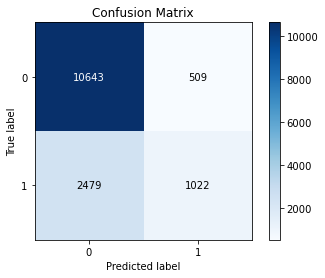

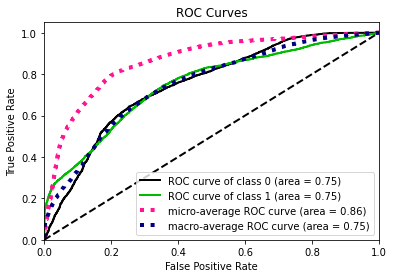

In [68]:
# LOGISTIC REGRESSION

from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

log_reg=LogisticRegression(max_iter=1000)
score_log_reg=cross_val_score(log_reg,X,np.ravel(y),scoring='accuracy',cv=10,n_jobs=-1)

X_train,X_test,y_train,y_test=train_test_split(X,np.ravel(y),test_size=0.3,random_state=1)
log_reg.fit(X_train,y_train)
y_pred=log_reg.predict(X_test)
y_proba=log_reg.predict_proba(X_test)

print("Accuracy Score : ",np.mean(score_log_reg))

from scikitplot.metrics import plot_confusion_matrix ,plot_roc

plot_confusion_matrix(y_test,y_pred)
plot_roc(y_test,y_proba)

Accuracy Score :  0.7902624994027245


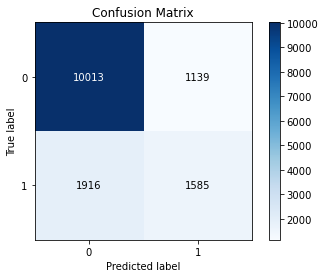

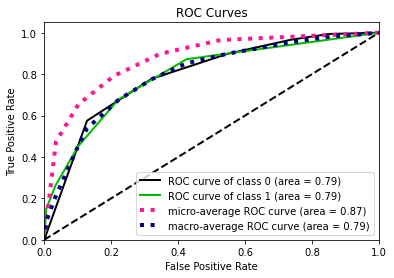

In [69]:
# KNN CLASSIFICATION

from sklearn.neighbors import KNeighborsClassifier 

knn=KNeighborsClassifier()
score_knn=cross_val_score(knn,X,np.ravel(y),scoring='accuracy',cv=10,n_jobs=-1)

X_train,X_test,y_train,y_test=train_test_split(X,np.ravel(y),test_size=0.3,random_state=1)
knn.fit(X_train,y_train)
y_pred=knn.predict(X_test)
y_proba=knn.predict_proba(X_test)

print("Accuracy Score : ",np.mean(score_knn))

plot_confusion_matrix(y_test,y_pred)
plot_roc(y_test,y_proba)

Accuracy Score :  0.8014209831865923


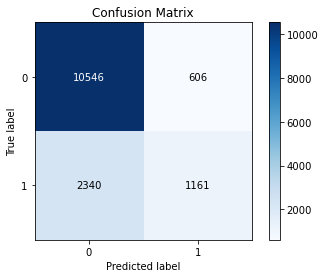

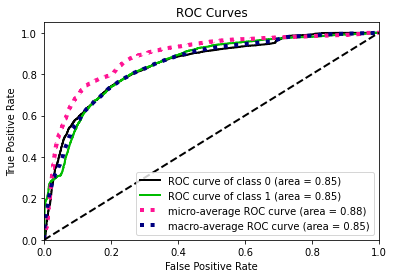

In [73]:
# NAIVE BAYES

from sklearn.naive_bayes import GaussianNB
naive_bayes=GaussianNB()
score_naive_bayes=cross_val_score(naive_bayes,X,np.ravel(y),scoring='accuracy',cv=10,n_jobs=-1)

X_train,X_test,y_train,y_test=train_test_split(X,np.ravel(y),test_size=0.3,random_state=1)
naive_bayes.fit(X_train,y_train)
y_pred=naive_bayes.predict(X_test)
y_proba=naive_bayes.predict_proba(X_test)

print("Accuracy Score : ",np.mean(score_naive_bayes))

plot_confusion_matrix(y_test,y_pred)
plot_roc(y_test,y_proba)

Accuracy Score :  0.8365750383304119


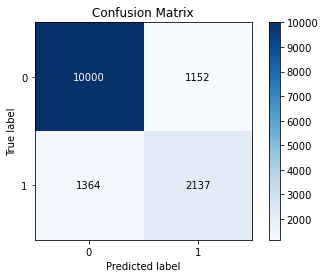

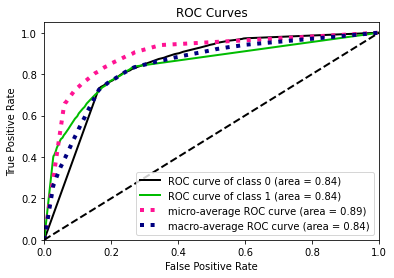

In [71]:
# DECISION TREE

from sklearn.tree import DecisionTreeClassifier , plot_tree 

dtree=DecisionTreeClassifier(min_samples_leaf=5,min_samples_split=10)
score_dtree=cross_val_score(dtree,X,np.ravel(y),scoring='accuracy',cv=10,n_jobs=-1)

X_train,X_test,y_train,y_test=train_test_split(X,np.ravel(y),test_size=0.3,random_state=1)
dtree.fit(X_train,y_train)
y_pred=dtree.predict(X_test)
y_proba=dtree.predict_proba(X_test)

print("Accuracy Score : ",np.mean(score_dtree))

plot_confusion_matrix(y_test,y_pred)
plot_roc(y_test,y_proba)

Accuracy Score :  0.8650956520864401


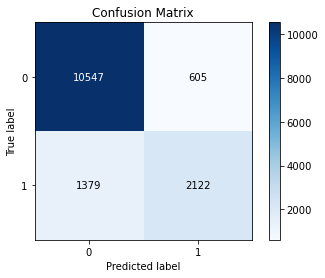

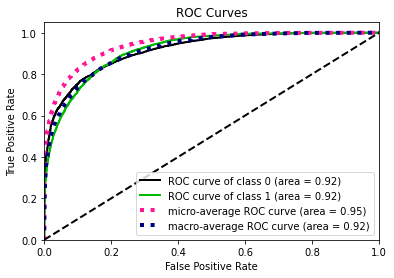

In [74]:
# RANDOM FORESTS

from sklearn.ensemble import RandomForestClassifier

rand_forest=RandomForestClassifier(min_samples_leaf=5,min_samples_split=10)
score_rand_forest=cross_val_score(rand_forest,X,np.ravel(y),scoring='accuracy',cv=10,n_jobs=-1)

X_train,X_test,y_train,y_test=train_test_split(X,np.ravel(y),test_size=0.3,random_state=1)
rand_forest.fit(X_train,y_train)
y_pred=rand_forest.predict(X_test)
y_proba=rand_forest.predict_proba(X_test)

print("Accuracy Score : ",np.mean(score_rand_forest))

plot_confusion_matrix(y_test,y_pred)
plot_roc(y_test,y_proba)

Accuracy Score :  0.8725277575891701


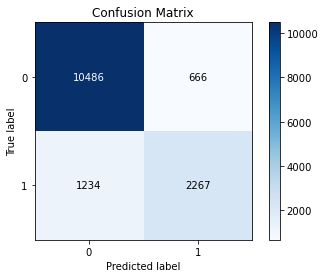

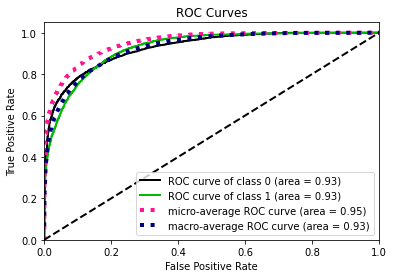

In [75]:
# XGB CLASSIFIER

from xgboost import XGBClassifier,XGBRFClassifier

xgb=XGBClassifier(n_estimators=100,use_label_encoder=False ,eval_metric='error')
score_xgb=cross_val_score(xgb,X,np.ravel(y),scoring='accuracy',cv=10,n_jobs=-1)

X_train,X_test,y_train,y_test=train_test_split(X,np.ravel(y),test_size=0.3,random_state=1)
xgb.fit(X_train,y_train)
y_pred=xgb.predict(X_test)
y_proba=xgb.predict_proba(X_test)

print("Accuracy Score : ",np.mean(score_xgb))

plot_confusion_matrix(y_test,y_pred)
plot_roc(y_test,y_proba)

Accuracy Score :  0.8589738431089506


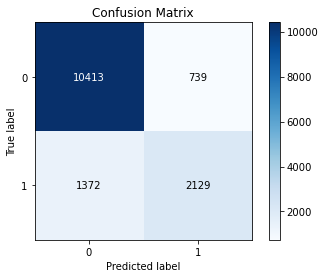

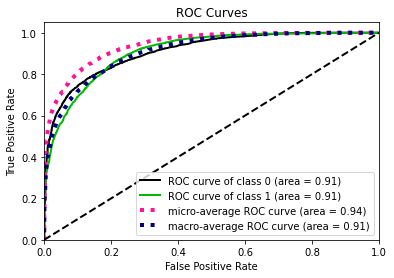

In [76]:
# ADABOOST

from sklearn.ensemble import AdaBoostClassifier

adaboost=AdaBoostClassifier()
score_adaboost=cross_val_score(adaboost,X,np.ravel(y),scoring='accuracy',cv=10,n_jobs=-1)

X_train,X_test,y_train,y_test=train_test_split(X,np.ravel(y),test_size=0.3,random_state=1)
adaboost.fit(X_train,y_train)
y_pred=adaboost.predict(X_test)
y_proba=adaboost.predict_proba(X_test)

print("Accuracy Score : ",np.mean(score_adaboost))

plot_confusion_matrix(y_test,y_pred)
plot_roc(y_test,y_proba)

In [ ]:
"""We used Random Forest and AdaBoost for stacking , 
as they gave good results , and consumed significantly lower time to train"""

Accuracy Score :  0.8658395764332302


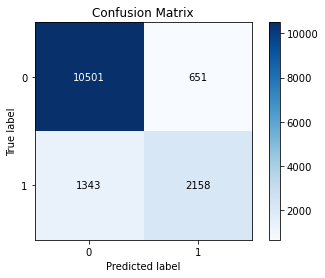

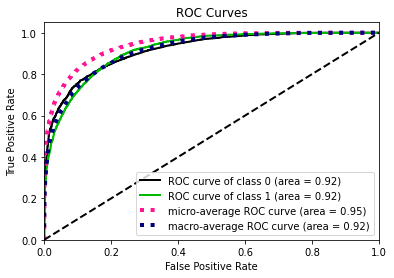

In [77]:
# STACKING

from sklearn.ensemble import StackingClassifier

level0=list()
level0.append(('rf',RandomForestClassifier(min_samples_leaf=5,min_samples_split=10)))
level0.append(('adaboost',AdaBoostClassifier()))

level1=LogisticRegression()

stack=StackingClassifier(estimators=level0,final_estimator=level1,cv=5,n_jobs=-1,passthrough=False)
cv=RepeatedStratifiedKFold(n_splits=10,n_repeats=3)
score_stack=cross_val_score(stack,X,y,scoring='accuracy',cv=cv, n_jobs=-1)

X_train,X_test,y_train,y_test=train_test_split(X,np.ravel(y),test_size=0.3,random_state=1)
stack.fit(X_train,y_train)
y_pred=stack.predict(X_test)
y_proba=stack.predict_proba(X_test)

print("Accuracy Score : ",np.mean(score_stack))

plot_confusion_matrix(y_test,y_pred)
plot_roc(y_test,y_proba)

In [78]:
scores=pd.DataFrame([np.mean(score_log_reg),np.mean(score_knn),np.mean(score_naive_bayes),np.mean(score_dtree),np.mean(score_rand_forest),np.mean(score_xgb),np.mean(score_adaboost),np.mean(score_stack)]
             ,index=['Log-reg Precion','KNN Precision','Naive Bayes Precision','Dtree Precision','Rand-Forest Precision','XGB Precision',"Adaboost Precision","Stacking Precision"],
             columns=['Scores'])
scores.T

,Log-reg Precion,KNN Precision,Naive Bayes Precision,Dtree Precision,Rand-Forest Precision,XGB Precision,Adaboost Precision,Stacking Precision
Scores,0.8005,0.790262,0.801421,0.836575,0.865096,0.872528,0.858974,0.86584


In [79]:
scores.Scores.idxmax()

'XGB Precision'

In [80]:
# We use XGB Classifier as our model

# HYPERPARAMETER TUNING OF XGBOOST MODEL

from sklearn.model_selection import GridSearchCV

xgb=xgb=XGBClassifier()

grid_param={
           'n_estimators':[50,100],
            'use_label_encoder':[False],
            'eval_metric':['error'],
            'colsample_bytree':[0.6,0.8],
            'subsample':[0.6,0.8]
           }

X_train,X_test,y_train,y_test=train_test_split(X,np.ravel(y),test_size=0.3,random_state=1)
grid_search=GridSearchCV(estimator=xgb,scoring='accuracy',param_grid=grid_param,cv=cv,n_jobs=-1)
grid_search.fit(X_train,y_train)

GridSearchCV(cv=RepeatedStratifiedKFold(n_repeats=3, n_splits=10, random_state=None),
             estimator=XGBClassifier(base_score=None, booster=None,
                                     colsample_bylevel=None,
                                     colsample_bynode=None,
                                     colsample_bytree=None, gamma=None,
                                     gpu_id=None, importance_type='gain',
                                     interaction_constraints=None,
                                     learning_rate=None, max_delta_step=None,
                                     max_depth=None, min_child_weight=N...
                                     n_estimators=100, n_jobs=None,
                                     num_parallel_tree=None, random_state=None,
                                     reg_alpha=None, reg_lambda=None,
                                     scale_pos_weight=None, subsample=None,
                                     tree_method=None, validate_p

In [81]:
grid_search.best_score_

0.8711086515977643

In [82]:
grid_search.best_params_

{'colsample_bytree': 0.6,
 'eval_metric': 'error',
 'n_estimators': 50,
 'subsample': 0.8,
 'use_label_encoder': False}

Accuracy Score :  0.8724048487866296


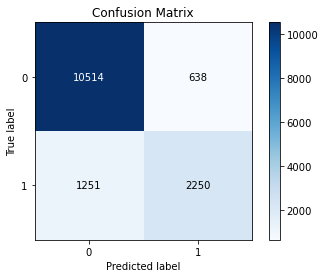

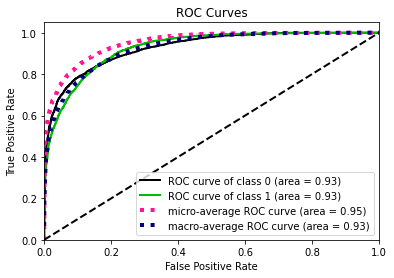

In [83]:
xgb=XGBClassifier(n_estimators=50,use_label_encoder=False ,eval_metric='error',subsample=0.8,colsample_bytree=0.6)
score_xgb=cross_val_score(xgb,X,np.ravel(y),scoring='accuracy',cv=10,n_jobs=-1)

X_train,X_test,y_train,y_test=train_test_split(X,np.ravel(y),test_size=0.3,random_state=1)
xgb.fit(X_train,y_train)
y_pred=xgb.predict(X_test)
y_proba=xgb.predict_proba(X_test)

print("Accuracy Score : ",np.mean(score_xgb))

plot_confusion_matrix(y_test,y_pred)
plot_roc(y_test,y_proba)

In [84]:
import pickle
filename='xgb.pickle'
pickle.dump(xgb,open(filename,'wb'))

In [85]:
model=pickle.load(open(filename,'rb'))
score=cross_val_score(model,X,y,scoring='accuracy',cv=cv, n_jobs=-1)
print("Precision : ",np.mean(score))

Precision :  0.873687891390041
